# Homework 1

## Problem 1

In [2]:
! head allsky_sample.csv

run,rerun,camcol,field,obj,type,ra,dec,psfMag_r,psfMag_g,psfMagErr_r,psfMagErr_g
7757,301,1,74,186,6,8.12944435106658,26.6266172894736,17.04889,18.16535,0.01654805,0.02145229
7757,301,1,74,187,6,8.12783867556709,26.627245975921,17.37402,17.92875,0.02894481,0.02568013
7757,301,1,74,188,3,8.12732322524192,26.6251199416623,20.1466,21.35297,0.3003744,0.3302762
4288,301,1,39,682,3,24.5161170422305,-1.16579446393527,22.97032,24.3259,0.2672399,0.5240437
4288,301,1,39,683,3,24.5179406515354,-1.1792069022485,22.62052,25.09109,0.1850479,0.6585805
4288,301,1,39,684,6,24.5189463293148,-1.15915086108891,21.4247,23.04125,0.06608655,0.1968172
4136,301,1,61,935,6,36.4715922759092,-1.06093938828308,22.71782,23.14112,0.158014,0.1799687
4136,301,1,61,936,3,36.4717583013136,-1.1378448207726,22.81683,23.88123,0.1742272,0.3260605
4136,301,1,61,937,3,36.4717582434391,-1.13784497192974,22.81147,23.87586,0.1734457,0.3247895


In [3]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
sky = np.genfromtxt('allsky_sample.csv', delimiter=',', names=True)

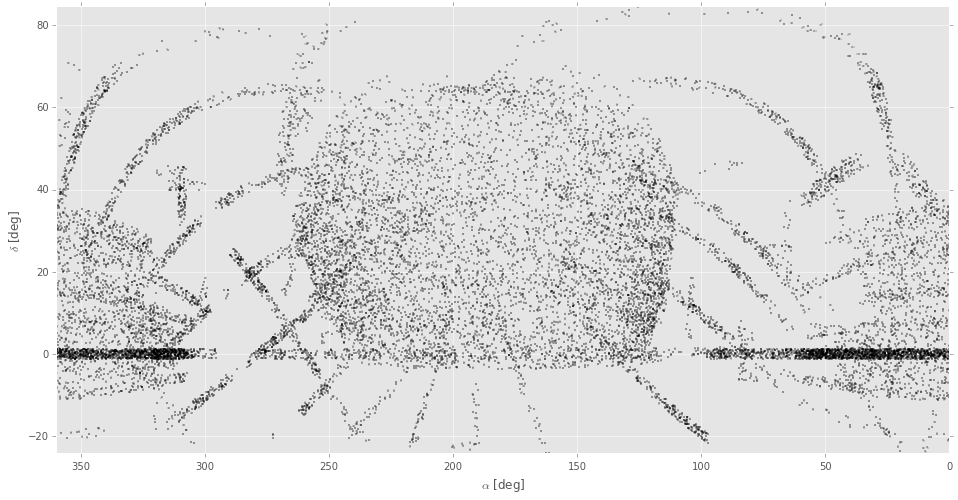

In [5]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.scatter(sky['ra'], sky['dec'], s=.1, color='black')
    ax.margins(0., 0.)
    ax.invert_xaxis()
    ax.set_xlabel(r"$\alpha$ [deg]")
    ax.set_ylabel(r"$\delta$ [deg]")

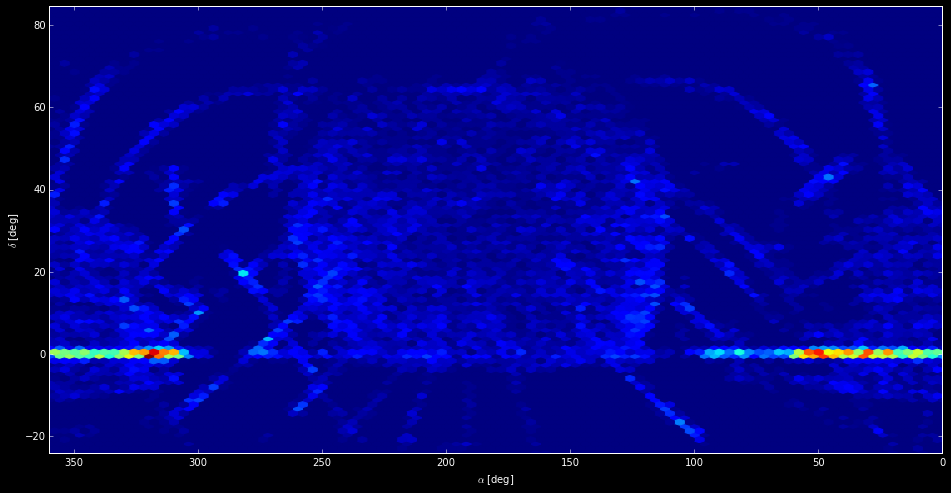

In [6]:
with plt.style.context(('dark_background')):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.hexbin(sky['ra'], sky['dec'], gridsize=90, cmap='jet')
    ax.margins(0., 0.)
    ax.invert_xaxis()
    ax.set_xlabel(r"$\alpha$ [deg]")
    ax.set_ylabel(r"$\delta$ [deg]")

## Problem 2

In [7]:
# Appendix of Reid et al. (http://adsabs.harvard.edu/cgi-bin/bib_query?2004ApJ...616..872R)
# This convention is also used by LAMBDA/WMAP (http://lambda.gsfc.nasa.gov/toolbox/tb_coordconv.cfm)
_angp = np.radians(192.859508333) #  12h 51m 26.282s (J2000)
_dngp = np.radians(27.128336111)  # +27d 07' 42.01" (J2000)
_l0   = np.radians(32.932)
_ce   = np.cos(_dngp)
_se   = np.sin(_dngp)

def equgal(ra, dec):
    ra = np.radians(ra)
    dec = np.radians(dec)

    cd, sd = np.cos(dec), np.sin(dec)
    ca, sa = np.cos(ra - _angp), np.sin(ra - _angp)

    sb = cd*_ce*ca + sd*_se
    l = np.arctan2(sd - sb*_se, cd*sa*_ce) + _l0
    b = np.arcsin(sb)

    l = np.where(l < 0, l + 2.*np.pi, l)

    l = np.degrees(l)
    b = np.degrees(b)

    return (l, b)

In [9]:
# Sanity checks: compare to outputs of the form at
# http://lambda.gsfc.nasa.gov/toolbox/tb_coordconv.cfm, with J2000 epoch
#
# you can also compare to outputs of AstroPy Coordinates library
#
print equgal(0., 0.), " == 96.33733, -60.18850"
print equgal(0., 90.), " == 122.93194 , 27.12830"
print equgal(357.22, 24.22), " == 105.12793, -36.47948"
print equgal(190.02, -55.77), " == 301.32291, 7.06621"

(96.337367351582259, -60.18846497887759)  == 96.33733, -60.18850
(122.932, 27.128336110999996)  == 122.93194 , 27.12830
(105.12797218944149, -36.479442053930811)  == 105.12793, -36.47948
(301.32295283890369, 7.0661750602450661)  == 301.32291, 7.06621


In [10]:
l, b = equgal(sky['ra'], sky['dec'])

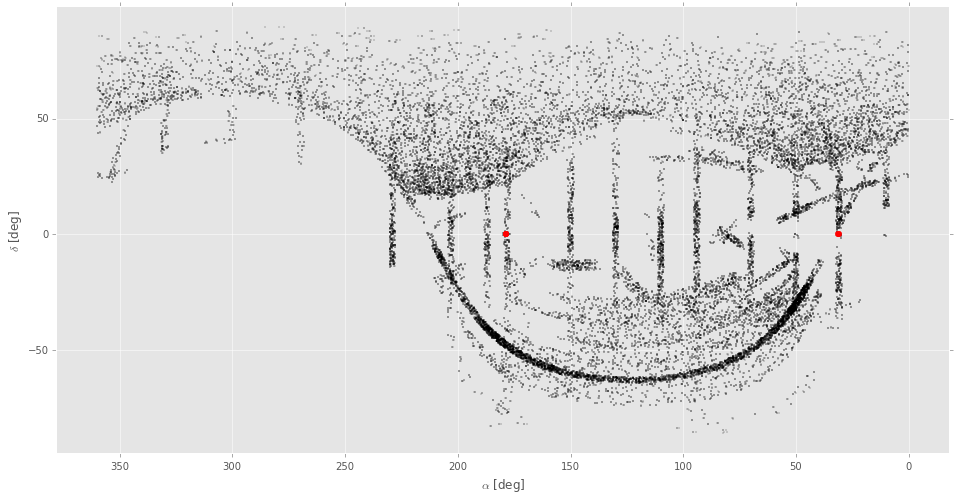

In [11]:
idx = np.argsort(np.abs(b))[:5]
closeSources = sky[idx]
cl, cb = l[idx], b[idx]

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.margins(0., 0.)
    ax.scatter(l, b, s=.1, color='black')
    ax.invert_xaxis()
    ax.set_xlabel(r"$\alpha$ [deg]")
    ax.set_ylabel(r"$\delta$ [deg]")
    
    ax.scatter(cl, cb, s=30, color='red')

In [12]:
columnNames = [ "run", "rerun", "camcol" , "field" , "obj", "ra", "dec" ]
print columnNames
print closeSources[columnNames]

['run', 'rerun', 'camcol', 'field', 'obj', 'ra', 'dec']
[(6573.0, 301.0, 2.0, 37.0, 291.0, 85.5962784438564, 30.0801070310202)
 (6573.0, 301.0, 2.0, 37.0, 290.0, 85.5991440517917, 30.0810385388757)
 (6573.0, 301.0, 2.0, 37.0, 292.0, 85.5934597999622, 30.0790483994057)
 (5405.0, 301.0, 4.0, 92.0, 6778.0, 281.985491692549, -1.6885436843977)
 (5405.0, 301.0, 4.0, 92.0, 6777.0, 282.055126764186, -1.55148269320665)]


## Problem 3

In [13]:
def gc_dist(lon1, lat1, lon2, lat2):
#    from numpy import sin, cos, arcsin, sqrt

    lon1 = np.radians(lon1); lat1 = np.radians(lat1)
    lon2 = np.radians(lon2); lat2 = np.radians(lat2)

    return np.degrees(2*np.arcsin(np.sqrt( (np.sin((lat1-lat2)*0.5))**2 + np.cos(lat1)*np.cos(lat2)*(np.sin((lon1-lon2)*0.5))**2 )))

In [14]:
# Quick sanity check
print gc_dist(0, 0, 0, 0)
print gc_dist(0, 90, 0, 0)
print gc_dist(45, 45, 90+45, 45)
print gc_dist(-10, 24, 110, 33)

0.0
90.0
60.0
99.2972927234


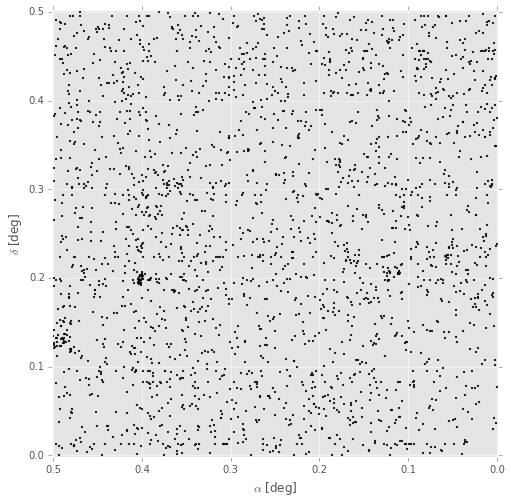

In [16]:
small = np.genfromtxt('small_sdss.csv', delimiter=',', names=True)
ra = small['ra']
dec = small['dec']

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(ra, dec, s=3, color='black')
    ax.margins(0., 0.)
    ax.invert_xaxis()
    ax.set_xlabel(r"$\alpha$ [deg]")
    ax.set_ylabel(r"$\delta$ [deg]")

In [17]:
# number of pairs (and distance)
i, j = np.triu_indices(small.size, k=1)
dist = gc_dist(ra[i], dec[i], ra[j], dec[j])
dist.size

2690040

In [18]:
# Print five closest pairs
idx = np.argsort(dist)[:5]
A = small[i[idx]]
B = small[j[idx]]
print columnNames
print A[columnNames]
print B[columnNames]
print dist[idx]*3600

['run', 'rerun', 'camcol', 'field', 'obj', 'ra', 'dec']
[(0.205820994102824, 0.0575443335720399)
 (0.478971767784628, 0.301925655736917)
 (0.0541334501161828, 0.234708285099869)
 (0.488909260534292, 0.131336671634702)
 (0.373665833724232, 0.0951574304505863)]
[(0.206074618194931, 0.0577650818858521)
 (0.479305628785369, 0.302124003625652)
 (0.0541743481230696, 0.234315753573333)
 (0.489289229629366, 0.131025471158507)
 (0.374085928282835, 0.0948937587225878)]
[ 1.21045113  1.39799619  1.42076279  1.76811497  1.78554822]


<a list of 100 Patch objects>

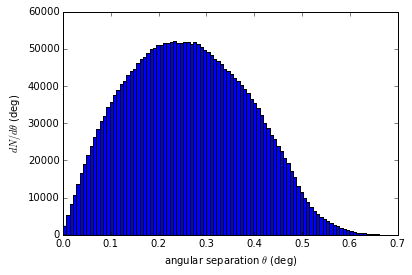

In [19]:
# Plot histogram
n, bins, patches = plt.hist(dist, bins=100)
plt.xlabel(r"angular separation $\theta$ (deg)");
plt.ylabel(r"$dN/d\theta$ (deg)");
patches

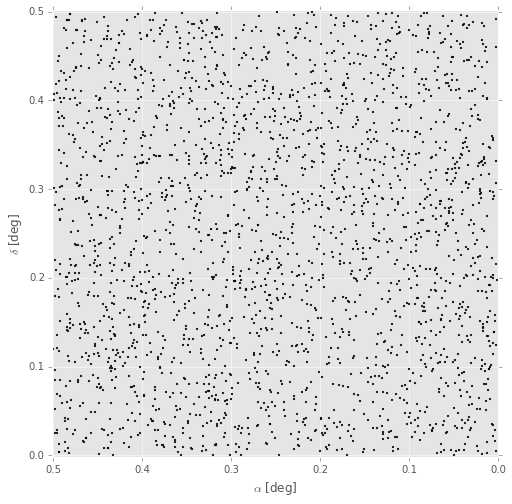

In [20]:
np.random.seed(42)
x = np.random.uniform(0, 0.5, small.size)
y = np.random.uniform(0, 0.5, small.size)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(x, y, s=3, color='black')
    ax.margins(0., 0.)
    ax.invert_xaxis()
    ax.set_xlabel(r"$\alpha$ [deg]")
    ax.set_ylabel(r"$\delta$ [deg]")

In [21]:
dist2 = gc_dist(x[i], y[i], x[j], y[j])
dist2.size

2690040

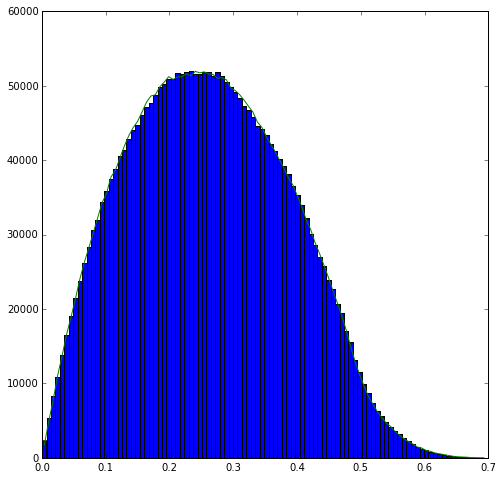

In [22]:
plt.subplots(figsize=(8,8))
n, bin_edges, patches = plt.hist(dist, bins=100)
hy, _ = np.histogram(dist2, bin_edges)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.plot(bin_centers, hy)

<Container object of 3 artists>

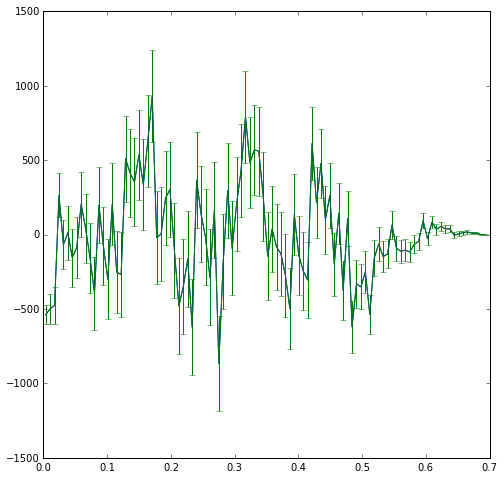

In [23]:
# Visualize the difference between two histograms
plt.subplots(figsize=(8,8))
plt.plot(bin_centers, hy-n)
plt.errorbar(bin_centers, hy-n, yerr=np.sqrt(hy+n))